In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [313]:
dvar2 = pd.read_csv("../Data/monthly_data.csv")
dvar2 = dvar2.dropna()

In [314]:
# convert DateTime column into datetime format
dvar2["datetime"] = pd.to_datetime(dvar2['datetime'])
# set DateTime as index
dvar2.set_index("datetime", inplace=True)
dvar2.info()
dvar2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-02-29 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   94 non-null     float64
 1   suction_tension (40cm)   94 non-null     float64
 2   suction_tension (70cm)   94 non-null     float64
 3   water_temperature        94 non-null     float64
 4   barometric_pressure_qfe  94 non-null     float64
 5   dew_point                94 non-null     float64
 6   water_level              94 non-null     float64
 7   inflow_linth (m3/s)      94 non-null     float64
 8   outflow_limmat (m3/s)    94 non-null     float64
 9   precipitation (mm)       94 non-null     float64
 10  Evapotranspiration (mm)  94 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.5 KB


,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-02-29,20.929298,4.169540,2.347845,3.763932,978.118839,-5.502229,405.714322,32.760742,71.399478,19.7,7.50,-0.000341
2012-03-31,6.118768,3.344197,2.320676,6.225431,978.553310,2.637923,405.729378,37.625103,74.477262,14.2,45.95,0.000037
2012-04-30,8.059861,3.810556,2.512500,8.165806,959.881884,4.671373,405.782916,53.851635,89.626478,62.2,47.34,0.000132
2012-05-31,9.134409,4.221102,2.569892,13.520385,969.124530,9.016868,405.838784,103.872095,138.309852,94.6,84.68,0.000138
2012-06-30,11.162889,4.964861,2.716153,19.031148,968.749407,13.509106,406.105133,128.218092,198.238391,203.8,71.86,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72,-0.000164
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87,0.000128
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63,-0.000087


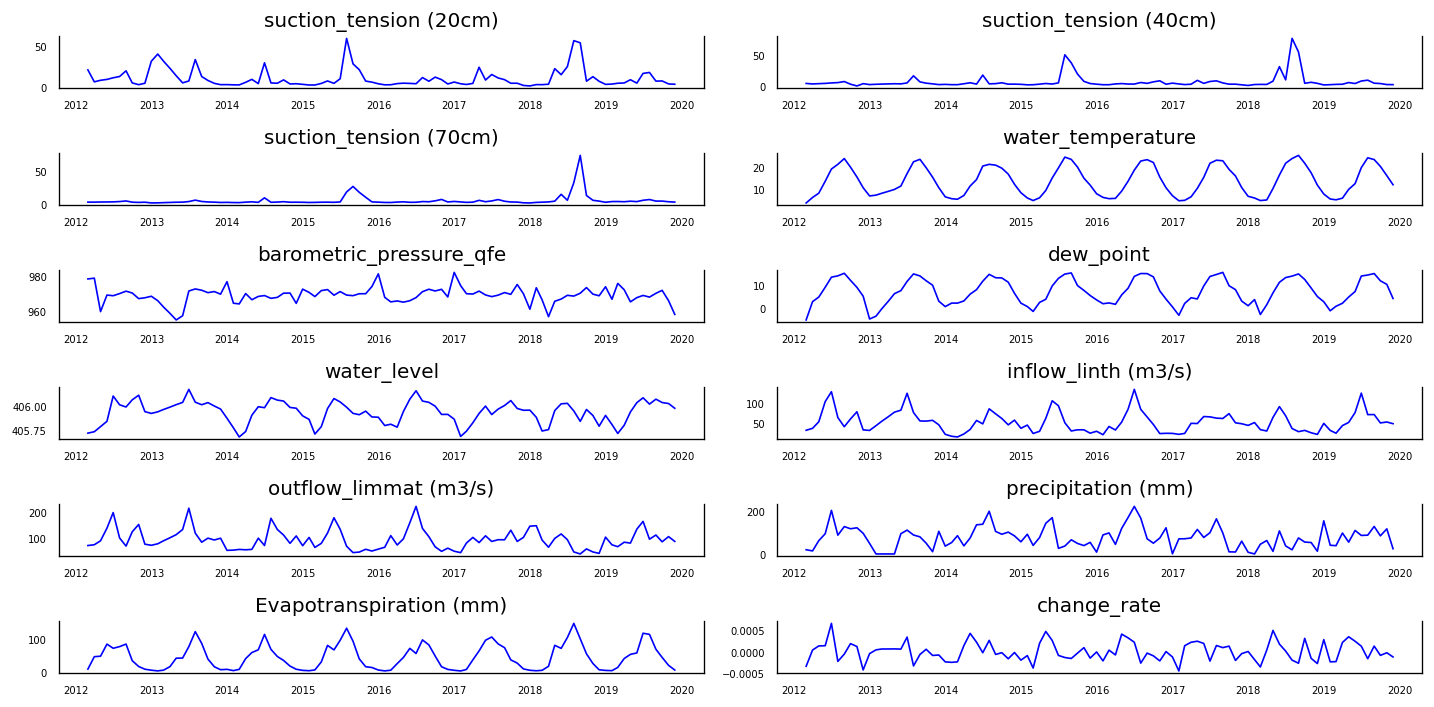

In [315]:
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data2 = dvar2[dvar2.columns[i]]
    ax.plot(data2, color='blue', linewidth=1)
    # Decorations
    ax.set_title(dvar2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [316]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [317]:
for name, column in dvar2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5499
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.553
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [271]:
dvar2_diff = dvar2.diff().dropna()

In [272]:
for name, column in dvar2_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7853
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2456
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [273]:
def ts_train_test_split(dvar2_diff, test_size):
    len_test = int(dvar2_diff.shape[0]*test_size)
    split_point = dvar2_diff.index[-len_test]
    dvar2_diff_train = dvar2_diff[dvar2_diff.index < split_point]
    dvar2_diff_test = dvar2_diff[dvar2_diff.index >= split_point]
    
    return dvar2_diff_train, dvar2_diff_test


In [286]:
dvar2_diff_train, dvar2_diff_test = ts_train_test_split(dvar2_diff, 0.1)
dvar2_diff_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-03-31,0.372076,0.196375,-0.313376,0.733981,-3.544816,1.326318,0.086574,18.847272,17.225391,59.0,27.39,0.000446
2019-04-30,3.976254,2.725311,0.795841,3.950519,-6.751577,2.753592,0.140165,7.822624,-3.413982,-42.5,12.83,0.000132
2019-05-31,-4.185946,-1.560746,-0.602746,2.594197,2.351167,2.462728,0.097804,24.471664,53.683440,54.6,4.44,-0.000104
2019-06-30,12.024374,4.007921,2.014123,7.207379,1.225161,6.881241,0.051417,48.023226,29.816794,-23.3,60.80,-0.000114
2019-07-31,1.180701,1.351966,1.081761,4.414020,-0.922437,0.453545,-0.066667,-53.159834,-68.516123,1.3,-3.56,-0.000291
2019-08-31,-10.739516,-4.841069,-2.301902,-0.794556,2.117350,0.651064,0.052052,0.117118,16.101976,40.8,-45.85,0.000292
2019-09-30,0.213225,-0.561119,-0.024345,-3.078955,1.650736,-3.214008,-0.035321,-20.694125,-26.085498,-44.0,-25.24,-0.000215
2019-10-31,-3.672391,-1.614578,-0.984049,-4.149592,-5.768433,-1.598007,-0.010540,2.300556,19.977473,32.7,-24.51,0.000061
2019-11-30,-0.427402,-0.140812,-0.516235,-4.108560,-7.679941,-6.266211,-0.050143,-4.217037,-18.533141,-93.0,-14.36,-0.000098


In [275]:
dvar2_diff_train

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-03-31,-14.810530,-0.825343,-0.027169,2.461499,0.434471,8.140153,0.015055,4.864362,3.077784,-5.5,38.45,0.000378
2012-04-30,1.941094,0.466359,0.191824,1.940374,-18.671426,2.033449,0.053538,16.226531,15.149216,48.0,1.39,0.000095
2012-05-31,1.074547,0.410547,0.057392,5.354580,9.242645,4.345496,0.055867,50.020461,48.683374,32.4,37.34,0.000006
2012-06-30,2.028480,0.743759,0.146260,5.510763,-0.375122,4.492238,0.266350,24.345997,59.928539,109.2,-12.82,0.000519
2012-07-31,1.577866,0.537738,0.465725,2.114383,1.197664,0.583104,-0.092051,-63.954270,-97.794102,-116.0,5.13,-0.000883
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,0.372076,0.196375,-0.313376,0.733981,-3.544816,1.326318,0.086574,18.847272,17.225391,59.0,27.39,0.000446
2019-04-30,3.976254,2.725311,0.795841,3.950519,-6.751577,2.753592,0.140165,7.822624,-3.413982,-42.5,12.83,0.000132
2019-05-31,-4.185946,-1.560746,-0.602746,2.594197,2.351167,2.462728,0.097804,24.471664,53.683440,54.6,4.44,-0.000104


In [276]:
from statsmodels.tsa.vector_ar.var_model import VAR # imports VAR

In [277]:
varmodel2 = VAR(dvar2_diff_train)
varmodel2.select_order(maxlags=4).summary()

,AIC,BIC,FPE,HQIC
0,21.30,21.64,1.775e+09,21.44
1,1.197,5.680*,3.409,3.001*
2,0.06934,8.690,1.329,3.537
3,-1.720,11.04,0.3778,3.412
4,-3.751*,13.15,0.1629*,3.045


In [278]:
# creating a walk forward fuction that will split a time series into training and testing set, and return a tuple of the test set 
# and the predicited test set
def walk_forward_VAR(dvar2_diff, test_size, lag_order):
    # splitting the data into train and test set
    dvar2_diff_train, dvar2_diff_test = ts_train_test_split(dvar2_diff, test_size)
 
    # makes a list of lists from the train set
    history = [list(x) for x in np.array(dvar2_diff_train)] 
    forecasts = [] # empty list to store our forecasts
    
    for t in range(dvar2_diff_test.shape[0]): # for each test set,
        # initialize a VAR model on the train set,
        model = VAR(np.array(history)) 
        model_fit = model.fit(lag_order) # fits the model
        
        # forecast just the next time step
        yhat = model_fit.forecast(model.y, steps=1)
        
        # add the forecast to the forecasts list
        forecasts.append(list(yhat[0])) 
        
        # add the actual test value as the last observation of the 
        # train set
        history.append(list(np.array(dvar2_diff_test)[t])) 
            
    # return a tuple of the test set and the predicited test set as
    # a tuple of dataframes 
    return dvar2_diff_test, pd.DataFrame(np.array(forecasts), index=dvar2_diff_test.index, columns=dvar2.columns)

In [301]:
dvar2_results_test, dvar2_results_pred = walk_forward_VAR(dvar2_diff, 0.1, 3)
dvar2_results_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-03-31,0.372076,0.196375,-0.313376,0.733981,-3.544816,1.326318,0.086574,18.847272,17.225391,59.0,27.39,0.000446
2019-04-30,3.976254,2.725311,0.795841,3.950519,-6.751577,2.753592,0.140165,7.822624,-3.413982,-42.5,12.83,0.000132
2019-05-31,-4.185946,-1.560746,-0.602746,2.594197,2.351167,2.462728,0.097804,24.471664,53.683440,54.6,4.44,-0.000104
2019-06-30,12.024374,4.007921,2.014123,7.207379,1.225161,6.881241,0.051417,48.023226,29.816794,-23.3,60.80,-0.000114
2019-07-31,1.180701,1.351966,1.081761,4.414020,-0.922437,0.453545,-0.066667,-53.159834,-68.516123,1.3,-3.56,-0.000291
2019-08-31,-10.739516,-4.841069,-2.301902,-0.794556,2.117350,0.651064,0.052052,0.117118,16.101976,40.8,-45.85,0.000292
2019-09-30,0.213225,-0.561119,-0.024345,-3.078955,1.650736,-3.214008,-0.035321,-20.694125,-26.085498,-44.0,-25.24,-0.000215
2019-10-31,-3.672391,-1.614578,-0.984049,-4.149592,-5.768433,-1.598007,-0.010540,2.300556,19.977473,32.7,-24.51,0.000061
2019-11-30,-0.427402,-0.140812,-0.516235,-4.108560,-7.679941,-6.266211,-0.050143,-4.217037,-18.533141,-93.0,-14.36,-0.000098


In [302]:
dvar2_results_pred

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-03-31,15.345395,14.769367,6.589923,2.231323,-2.183921,0.241777,-0.095872,-23.280203,-40.172759,32.355903,45.856366,-0.000004
2019-04-30,-3.971648,2.930147,2.211821,1.134049,-10.498494,1.424366,0.045740,19.549904,42.559286,42.281551,-4.747602,-0.000101
2019-05-31,5.384070,2.432431,-1.230923,4.452001,9.981632,4.228781,0.078566,21.111071,18.974423,-3.167338,29.966240,-0.000152
2019-06-30,18.983430,14.514154,7.628676,5.271776,2.940413,2.640347,0.002659,-5.995871,-20.833938,30.445399,35.353784,-0.000234
2019-07-31,-4.515766,10.464420,5.866226,3.769187,-8.632383,3.863598,0.039700,-6.975456,0.061239,36.704097,-23.440298,-0.000029
2019-08-31,-18.260617,-3.222969,-0.499704,0.957411,5.886093,3.914439,0.078985,12.271881,30.820755,-32.238123,-20.226429,0.000359
2019-09-30,16.079294,-4.131941,-2.721226,0.834614,-2.175175,-0.792767,0.030460,-5.091953,-19.350538,-88.928163,11.084839,-0.000053
2019-10-31,-13.319125,-8.146919,-3.850957,-7.611322,2.075537,-7.206657,-0.064528,-3.627105,7.168363,13.426639,-54.090604,-0.000072
2019-11-30,-5.331455,-10.697151,-5.741438,-4.450678,2.511724,-5.114978,-0.061099,-11.530097,-20.983509,-40.955795,-8.818180,-0.000125


In [303]:
def invert_transformation(dvar2, dvar2_results_test, first_diff=False): #first diff? or second diff?
    dvar_fc = dvar2_results_test.copy()
    columns = dvar2.columns
    for col in columns:        
        dvar_fc[col] = dvar2[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [304]:
dvar_results1 = invert_transformation(dvar2, dvar2_results_test, first_diff=True)        
dvar_results1

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-03-31,3.500581,2.428999,2.084152,12.687264,954.762250,5.363281,406.062690,67.924881,104.465712,83.4,32.15,0.000322
2019-04-30,7.476835,5.154311,2.879994,16.637783,948.010673,8.116872,406.202855,75.747505,101.051730,40.9,44.98,0.000454
2019-05-31,3.290888,3.593565,2.277247,19.231980,950.361840,10.579600,406.300660,100.219169,154.735170,95.5,49.42,0.000350
2019-06-30,15.315263,7.601486,4.291370,26.439359,951.587001,17.460841,406.352077,148.242395,184.551965,72.2,110.22,0.000235
2019-07-31,16.495964,8.953452,5.373131,30.853379,950.664563,17.914387,406.285410,95.082561,116.035842,73.5,106.66,-0.000055
2019-08-31,5.756448,4.112383,3.071229,30.058823,952.781913,18.565451,406.337462,95.199680,132.137818,114.3,60.81,0.000237
2019-09-30,5.969672,3.551264,3.046884,26.979868,954.432649,15.351443,406.302142,74.505555,106.052320,70.3,35.57,0.000022
2019-10-31,2.297281,1.936687,2.062835,22.830276,948.664216,13.753436,406.291602,76.806111,126.029793,103.0,11.06,0.000083
2019-11-30,1.869879,1.795875,1.546600,18.721716,940.984275,7.487225,406.241459,72.589074,107.496653,10.0,-3.30,-0.000015


In [305]:
def invert_transformation(dvar2, dvar2_results_pred, first_diff=False): #first diff? or second diff?
    dvar_fc = dvar2_results_pred.copy()
    columns = dvar2.columns
    for col in columns:        
        dvar_fc[col] = dvar2[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [306]:
dvar_results2 = invert_transformation(dvar2, dvar2_results_pred, first_diff=True)        
dvar_results2

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-03-31,18.473900,17.001992,8.987451,14.184606,956.123145,4.278739,405.880245,25.797406,47.067562,56.755903,50.616366,-0.000127
2019-04-30,14.502251,19.932139,11.199272,15.318655,945.624651,5.703106,405.925984,45.347310,89.626848,99.037454,45.868765,-0.000228
2019-05-31,19.886321,22.364570,9.968349,19.770656,955.606283,9.931887,406.004551,66.458380,108.601271,95.870116,75.835005,-0.000380
2019-06-30,38.869752,36.878724,17.597024,25.042432,958.546696,12.572234,406.007210,60.462510,87.767333,126.315515,111.188789,-0.000614
2019-07-31,34.353985,47.343144,23.463250,28.811619,949.914313,16.435832,406.046910,53.487054,87.828572,163.019612,87.748491,-0.000643
2019-08-31,16.093369,44.120175,22.963546,29.769030,955.800406,20.350271,406.125895,65.758935,118.649328,130.781489,67.522062,-0.000284
2019-09-30,32.172662,39.988234,20.242320,30.603644,953.625231,19.557504,406.156354,60.666982,99.298789,41.853326,78.606901,-0.000338
2019-10-31,18.853538,31.841315,16.391363,22.992322,955.700768,12.350847,406.091827,57.039877,106.467152,55.279964,24.516298,-0.000410
2019-11-30,13.522083,21.144164,10.649925,18.541645,958.212492,7.235869,406.030728,45.509780,85.483643,14.324169,15.698118,-0.000534


<AxesSubplot: xlabel='datetime'>

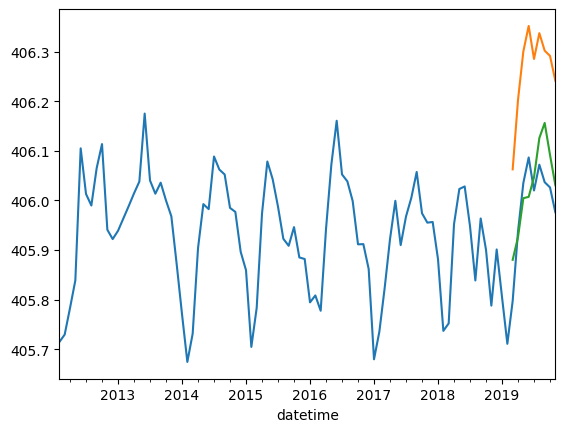

In [311]:
import matplotlib.pyplot as plt
dvar2["water_level"].plot()
dvar_results1["water_level"].plot()
dvar_results2["water_level"].plot()